## Crude Oil Price Analysis and Prediction

This project aims to leverage machine learning techniques to analyze historical crude oil prices and develop predictive models for future price movements.Machine learning algorithms offer a data-driven approach to uncover patterns, trends, and relationships within the complex and dynamic crude oil market.

In [1]:
import pandas as pd
data = pd.read_excel('D:\EDA\Crude Oil Price Prediction\Datasets\oil_production.xlsx')

In [2]:
df = data.copy() 

In [3]:
df.head()

,Join,a1 Saudi Production Change,a1 WTI Production Change,a2 Spare Capacity,a2 WTI Real Price (GDP Deflated),a3 Opec Disruption,a3 Non-OPEC Disruption,a4 Capacity percent change,a4 World GDP Change,a4 WTI Real Price (GDP Deflated),...,f3 Dow Jones UBS Commodity Index,f4 Open Interest,f5 Money Managers Long,f5 Money Managers Short,f5 Money Managers Net,f6 Producers/Merchants long,f6 PProducers/Merchants short,f6 Producers/Merchants net,US retail regular gas,Crude Oil cost per Barrel
0,1Q 2012,1.04,9.43,2.66,99.71,0.763333,0.910000,0.52,3.43,99.71,...,-16.31,1475.075,239.246667,-39.676667,199.570000,224.533333,-306.140000,-81.606667,3.490000,104.230000
1,2Q 2012,0.72,-8.56,2.58,89.99,0.840000,0.873333,1.73,3.26,89.99,...,-14.36,1509.067,188.060000,-57.886667,130.176667,217.853333,-271.756667,-53.903333,3.590000,98.010000
2,3Q 2012,0.10,2.99,2.48,88.36,1.090000,0.910000,1.12,3.20,88.36,...,5.92,1482.750,202.123333,-52.433333,149.690000,253.366667,-295.813333,-42.446667,3.520000,93.480000
3,4Q 2012,-0.21,-6.46,2.85,84.02,1.353333,0.750000,0.96,2.96,84.02,...,-1.14,1547.422,185.636667,-81.086667,104.553333,276.270000,-296.570000,-20.300000,3.346667,92.876667
4,1Q 2013,-0.83,-8.37,3.27,89.70,1.323333,0.886667,0.04,2.87,89.70,...,-3.12,1608.228,214.830000,-37.046667,177.783333,273.490000,-262.586667,10.906667,3.393333,96.193333


### To find out the Duplicate Column

In [4]:
# Transpose the DataFrame
df_transposed = df.T

# Check for duplicate columns
duplicate_columns = df_transposed[df_transposed.duplicated()]

# Print the duplicate columns (if any)
print("Duplicate Columns:")
print(duplicate_columns)

Duplicate Columns:
                                        0         1      2         3   \
a4 WTI Real Price (GDP Deflated)     99.71     89.99  88.36     84.02   
b1 WTI Real Price (GDP Deflated)     99.71     89.99  88.36     84.02   
b2 Opec Disruption                0.763333      0.84   1.09  1.353333   
b2 Non-OPEC Disruption                0.91  0.873333   0.91      0.75   
b4 Capacity percent change            0.52      1.73   1.12      0.96   
b4 World GDP Change                   3.43      3.26    3.2      2.96   
b4 WTI Real Price (GDP Deflated)     99.71     89.99  88.36     84.02   
c1 WTI Real Price (GDP Deflated)     99.71     89.99  88.36     84.02   
c2 World GDP Change                   3.43      3.26    3.2      2.96   
c2 WTI Real Price (GDP Deflated)     99.71     89.99  88.36     84.02   
d1 non-OECD GDP growth                3.43      3.26    3.2      2.96   
d2 World Consumption Change           0.84      1.84   0.96      1.99   
d2 World GDP Change             

In [5]:
duplicate_column = list(duplicate_columns.index)
duplicate_column

['a4 WTI Real Price (GDP Deflated)',
 'b1 WTI Real Price (GDP Deflated)',
 'b2 Opec Disruption',
 'b2 Non-OPEC Disruption',
 'b4 Capacity percent change',
 'b4 World GDP Change',
 'b4 WTI Real Price (GDP Deflated)',
 'c1 WTI Real Price (GDP Deflated)',
 'c2 World GDP Change',
 'c2 WTI Real Price (GDP Deflated)',
 'd1 non-OECD GDP growth',
 'd2 World Consumption Change',
 'd2 World GDP Change',
 'd2 WTI Real Price (GDP Deflated)']

### Drop the Duplicate Column

In [6]:
for col in duplicate_column:
    df.pop(col)

df.head()

,Join,a1 Saudi Production Change,a1 WTI Production Change,a2 Spare Capacity,a2 WTI Real Price (GDP Deflated),a3 Opec Disruption,a3 Non-OPEC Disruption,a4 Capacity percent change,a4 World GDP Change,b1 non-OPEC Production change),...,f3 Dow Jones UBS Commodity Index,f4 Open Interest,f5 Money Managers Long,f5 Money Managers Short,f5 Money Managers Net,f6 Producers/Merchants long,f6 PProducers/Merchants short,f6 Producers/Merchants net,US retail regular gas,Crude Oil cost per Barrel
0,1Q 2012,1.04,9.43,2.66,99.71,0.763333,0.910000,0.52,3.43,0.86,...,-16.31,1475.075,239.246667,-39.676667,199.570000,224.533333,-306.140000,-81.606667,3.490000,104.230000
1,2Q 2012,0.72,-8.56,2.58,89.99,0.840000,0.873333,1.73,3.26,0.68,...,-14.36,1509.067,188.060000,-57.886667,130.176667,217.853333,-271.756667,-53.903333,3.590000,98.010000
2,3Q 2012,0.10,2.99,2.48,88.36,1.090000,0.910000,1.12,3.20,0.52,...,5.92,1482.750,202.123333,-52.433333,149.690000,253.366667,-295.813333,-42.446667,3.520000,93.480000
3,4Q 2012,-0.21,-6.46,2.85,84.02,1.353333,0.750000,0.96,2.96,1.17,...,-1.14,1547.422,185.636667,-81.086667,104.553333,276.270000,-296.570000,-20.300000,3.346667,92.876667
4,1Q 2013,-0.83,-8.37,3.27,89.70,1.323333,0.886667,0.04,2.87,0.61,...,-3.12,1608.228,214.830000,-37.046667,177.783333,273.490000,-262.586667,10.906667,3.393333,96.193333


### Some Analysis

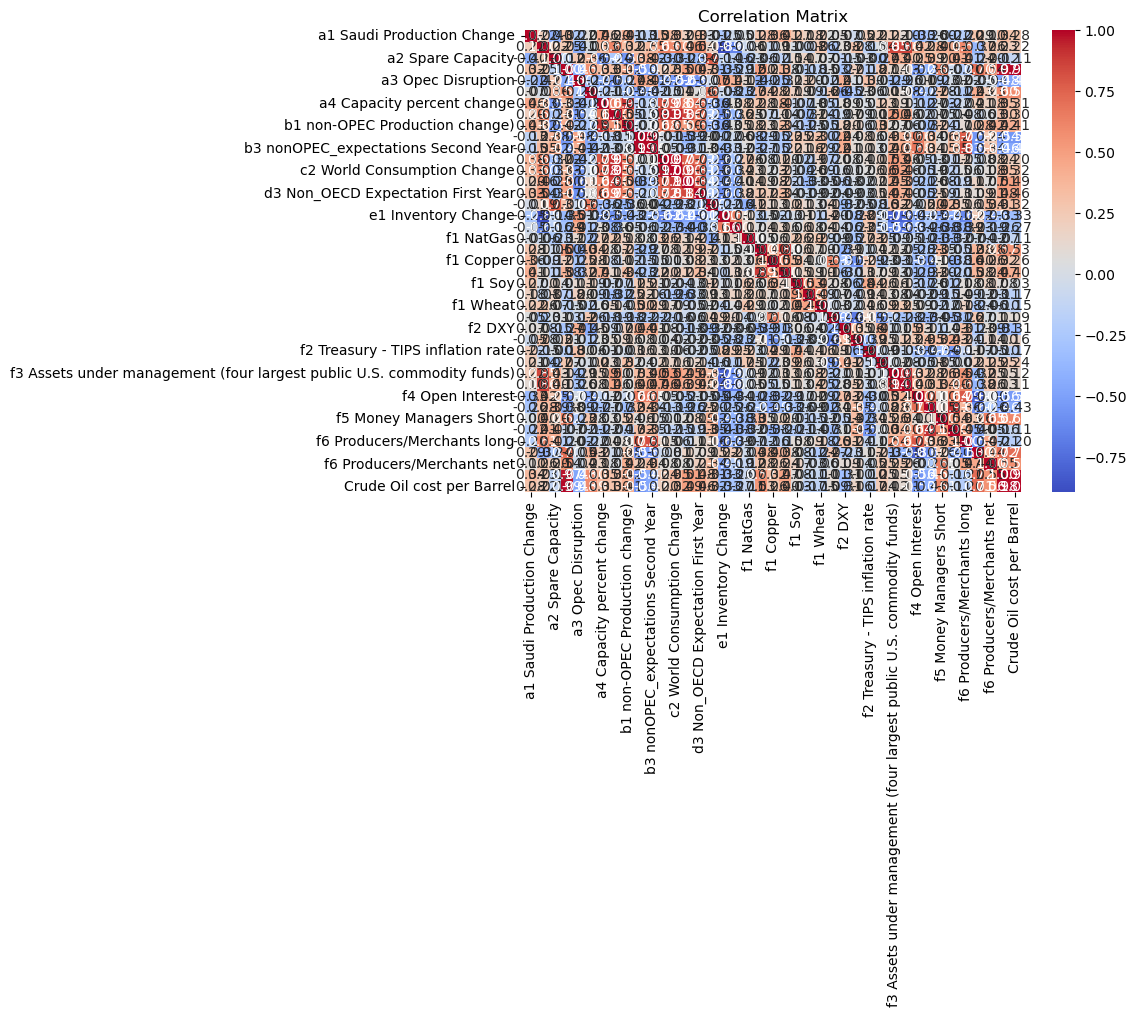

In [7]:
df.drop('Join',axis=1,inplace = True)
correlation_matrix = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### FOR BETTER VISUALIZATION

In [8]:
corr=df.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [
        dict(selector="th", props=[("font-size", "7pt")]),
        dict(selector="td", props=[('padding', "0em 0em")]),
        dict(selector="th:hover", props=[("font-size", "12pt")]),
        dict(selector="tr:hover td:hover", props=[('max-width', '200px'), ('font-size', '12pt')])
    ]

# Set precision on the DataFrame
pd.set_option('display.precision', 2)

corr.style.background_gradient(cmap, axis=1) \
    .set_properties(**{'max-width': '50px', 'font-size': '8pt'}) \
    .set_caption("Hover to magnify") \
    .set_table_styles(magnify())

,a1 Saudi Production Change,a1 WTI Production Change,a2 Spare Capacity,a2 WTI Real Price (GDP Deflated),a3 Opec Disruption,a3 Non-OPEC Disruption,a4 Capacity percent change,a4 World GDP Change,b1 non-OPEC Production change),b3 nonOPEC_expectations First Year,b3 nonOPEC_expectations Second Year,c1 y-o-y % OECD Consumption Change,c2 World Consumption Change,d1 non-OECD Consumption Growth,d3 Non_OECD Expectation First Year,d3 Non_OECD Expectation Second Year,e1 Inventory Change,e1 Spread Change,f1 NatGas,f1 Gold,f1 Copper,f1 Silver,f1 Soy,f1 Corn,f1 Wheat,f2 S&P,f2 DXY,f2 Treasury,f2 Treasury - TIPS inflation rate,f2 Crude oil implied volatility,f3 Assets under management (four largest public U.S. commodity funds),f3 Dow Jones UBS Commodity Index,f4 Open Interest,f5 Money Managers Long,f5 Money Managers Short,f5 Money Managers Net,f6 Producers/Merchants long,f6 PProducers/Merchants short,f6 Producers/Merchants net,US retail regular gas,Crude Oil cost per Barrel
a1 Saudi Production Change,1.000000,0.222652,-0.398364,0.317320,-0.221663,0.071492,0.460680,0.204197,0.408829,-0.134981,-0.152168,0.379513,0.333053,0.199301,0.326947,-0.005777,-0.246670,-0.053737,0.010705,0.280464,0.355405,0.411564,0.265103,0.181517,0.218386,0.052582,0.070447,-0.053568,0.219948,0.211031,0.216876,0.104869,-0.331588,-0.263256,0.004725,-0.221699,-0.197161,0.288800,0.095856,0.344123,0.284842
a1 WTI Production Change,0.222652,1.000000,0.218403,0.249905,-0.409710,-0.001283,0.333071,0.610469,0.318258,0.268854,0.353229,0.629677,0.598783,0.463914,0.542000,0.191316,-0.893211,-0.646999,-0.061204,0.108281,-0.089574,0.105401,0.000212,-0.083823,0.261161,-0.234941,0.080539,0.278324,-0.147745,0.038176,0.847400,0.861486,0.424276,0.283889,0.397713,0.407475,0.606512,-0.373288,0.263427,0.233554,0.220153
a2 Spare Capacity,-0.398364,0.218403,1.000000,-0.124974,0.268997,0.356122,-0.540302,-0.235236,-0.563747,0.383704,0.415519,-0.296679,-0.313985,-0.275759,-0.339146,0.767739,-0.135316,-0.159691,-0.225949,-0.063261,-0.115164,-0.149021,0.139826,0.174346,0.073606,0.007103,-0.150363,-0.027706,-0.004379,-0.267106,0.431370,0.403771,0.246376,0.388540,0.195332,0.411781,0.412761,-0.235269,0.199622,-0.119868,-0.114770
a2 WTI Real Price (GDP Deflated),0.317320,0.249905,-0.124974,1.000000,-0.459180,0.566647,0.328866,0.312375,0.424703,-0.550356,-0.466208,0.218094,0.333030,0.496350,0.469742,0.311913,-0.349595,-0.293350,-0.124184,0.504165,0.208984,0.382827,0.007226,-0.181950,-0.151036,0.034843,-0.266676,0.208287,-0.181605,0.272104,0.141552,0.134467,-0.522759,-0.380226,0.617027,-0.065095,-0.198545,0.702216,0.542411,0.974897,0.994143
a3 Opec Disruption,-0.221663,-0.409710,0.268997,-0.459180,1.000000,-0.270161,-0.396755,-0.535605,-0.272914,0.480187,0.408455,-0.419307,-0.523622,-0.629835,-0.579841,-0.067145,0.512432,0.408222,0.124808,-0.403287,-0.253334,-0.321844,0.113499,0.198493,-0.021062,-0.122320,0.409593,0.006782,0.301155,0.011251,-0.294519,-0.255446,-0.008707,0.094414,-0.228169,-0.015177,0.018406,-0.054039,-0.038302,-0.478618,-0.483849
a3 Non-OPEC Disruption,0.071492,-0.001283,0.356122,0.566647,-0.270161,1.000000,-0.212892,-0.099635,-0.254316,-0.464258,-0.422052,-0.145758,-0.041248,0.167219,0.060845,0.669083,-0.076874,-0.230411,-0.268289,0.344909,0.277204,0.268436,0.190756,0.088624,-0.156818,0.263847,-0.448855,-0.225623,0.060907,-0.003636,0.149019,0.083864,-0.472111,-0.273793,0.284541,-0.113667,-0.215047,0.427693,0.226699,0.598689,0.586021
a4 Capacity percent change,0.460680,0.333071,-0.540302,0.328866,-0.396755,-0.212892,1.000000,0.665778,0.907671,-0.175647,-0.131149,0.790014,0.778486,0.637358,0.692083,-0.360443,-0.432798,0.081899,0.217550,0.276229,0.181878,0.410437,-0.065683,-0.176894,0.045304,-0.176105,0.092203,0.050339,0.013210,0.226950,0.187856,0.105651,-0.122994,-0.272305,0.025683,-0.220627,-0.040938,0.205601,0.177749,0.351371,0.314817
a4 World GDP Change,0.204197,0.610469,-0.235236,0.312375,-0.535605,-0.099635,0.665778,1.000000,0.548933,-0.151702,-0.082323,0.912451,0.947145,0.864360,0.


## Displaying correlation of all features vs Crude Oil cost

In [9]:
df.corr()['Crude Oil cost per Barrel'].sort_values(ascending=False)

Crude Oil cost per Barrel                                                1.00
a2 WTI Real Price (GDP Deflated)                                         0.99
US retail regular gas                                                    0.98
f6 PProducers/Merchants short                                            0.71
f5 Money Managers Short                                                  0.61
a3 Non-OPEC Disruption                                                   0.59
f6 Producers/Merchants net                                               0.56
f1 Gold                                                                  0.53
d1 non-OECD Consumption Growth                                           0.49
d3 Non_OECD Expectation First Year                                       0.46
b1 non-OPEC Production change)                                           0.41
f1 Silver                                                                0.40
d3 Non_OECD Expectation Second Year                             

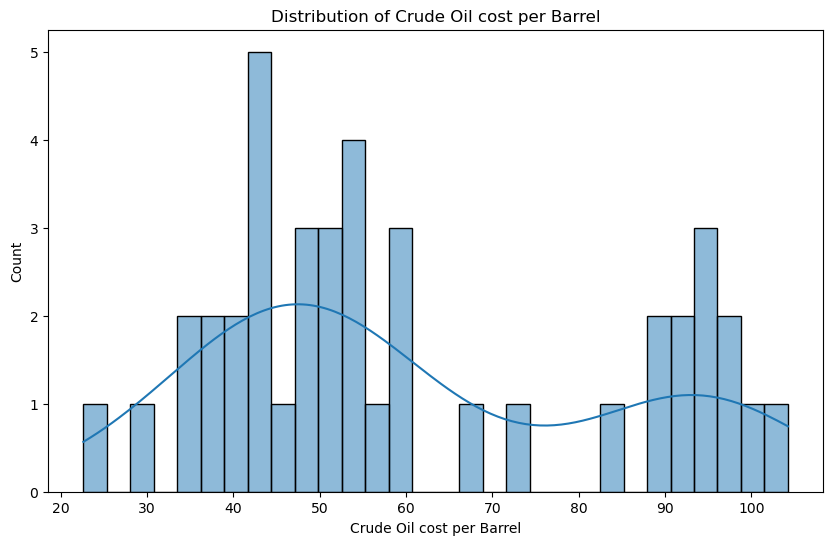

In [10]:
# Histogram of Crude Oil cost per Barrel
plt.figure(figsize=(10, 6))
sns.histplot(df['Crude Oil cost per Barrel'], bins=30, kde=True)
plt.title('Distribution of Crude Oil cost per Barrel')
plt.xlabel('Crude Oil cost per Barrel')
plt.show()

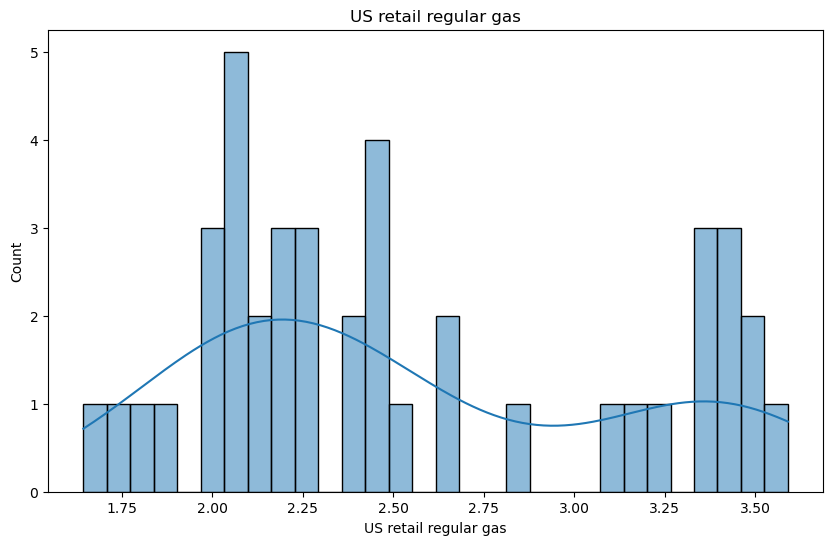

In [11]:
# Histogram of US retail regular gas
plt.figure(figsize=(10, 6))
sns.histplot(df['US retail regular gas'], bins=30, kde=True)
plt.title('US retail regular gas')
plt.xlabel('US retail regular gas')
plt.show()

### Some Observation 

- The Crude oil price is similar to the US regular gas
- Most duplicate features are available in the dataset


### Applying Linear Regression


In [12]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [13]:
# Drop the dependent variable from the independent features
X = df.drop('Crude Oil cost per Barrel', axis=1)
y = df['Crude Oil cost per Barrel']

In [14]:
# Data preprocessing
# Handle missing values
df.isnull().sum()

a1 Saudi Production Change                                               0
a1 WTI Production Change                                                 0
a2 Spare Capacity                                                        0
a2 WTI Real Price (GDP Deflated)                                         0
a3 Opec Disruption                                                       0
a3 Non-OPEC Disruption                                                   0
a4 Capacity percent change                                               0
a4 World GDP Change                                                      0
b1 non-OPEC Production change)                                           0
b3 nonOPEC_expectations First Year                                       0
b3 nonOPEC_expectations Second Year                                      0
c1 y-o-y % OECD Consumption Change                                       0
c2 World Consumption Change                                              0
d1 non-OECD Consumption G

In [15]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)               

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 21.104766438292607
R-squared: 0.9300033106717038


### Test with new random data

You play with different test data based on the model requirement

In [20]:
import pandas as pd
import numpy as np

# Define values for the new observation
new_data_values = pd.DataFrame({
   'a1 Saudi Production Change': [np.random.rand()],
    'a1 WTI Production Change': [np.random.rand()],
    'a2 Spare Capacity': [np.random.rand()],
    'a2 WTI Real Price (GDP Deflated)': [np.random.rand()],
    'a3 Opec Disruption': [np.random.rand()],
    'a3 Non-OPEC Disruption': [np.random.rand()],
    'a4 Capacity percent change': [np.random.rand()],
    'a4 World GDP Change': [np.random.rand()],
    'b1 non-OPEC Production change)': [np.random.rand()],
    'b3 nonOPEC_expectations First Year': [np.random.rand()],
    'b3 nonOPEC_expectations Second Year': [np.random.rand()],
    'c1 y-o-y % OECD Consumption Change': [np.random.rand()],
    'c2 World Consumption Change': [np.random.rand()],
    'd1 non-OECD Consumption Growth': [np.random.rand()],
    'd3 Non_OECD Expectation First Year': [np.random.rand()],
    'd3 Non_OECD Expectation Second Year': [np.random.rand()],
    'e1 Inventory Change': [np.random.rand()],
    'e1 Spread Change': [np.random.rand()],
    'f1 NatGas': [np.random.rand()],
    'f1 Gold': [np.random.rand()],
    'f1 Copper': [np.random.rand()],
    'f1 Silver': [np.random.rand()],
    'f1 Soy': [np.random.rand()],
    'f1 Corn': [np.random.rand()],
    'f1 Wheat': [np.random.rand()],
    'f2 S&P': [np.random.rand()],
    'f2 DXY': [np.random.rand()],
    'f2 Treasury': [np.random.rand()],
    'f2 Treasury - TIPS inflation rate': [np.random.rand()],
    'f2 Crude oil implied volatility': [np.random.rand()],
    'f3 Assets under management (four largest public U.S. commodity funds)': [np.random.rand()],
    'f3 Dow Jones UBS Commodity Index': [np.random.rand()],
    'f4 Open Interest': [np.random.rand()],
    'f5 Money Managers Long': [np.random.rand()],
    'f5 Money Managers Short': [np.random.rand()],
    'f5 Money Managers Net': [np.random.rand()],
    'f6 Producers/Merchants long': [np.random.rand()],
    'f6 PProducers/Merchants short': [np.random.rand()],
    'f6 Producers/Merchants net': [np.random.rand()],
    'US retail regular gas': [np.random.rand()]
})


# Feature scaling for new_data
new_data_scaled = scaler.transform(new_data_values)

# Make predictions
new_predictions = model.predict(new_data_scaled)

# Display the predictions
print("Predictions for new data:")
print(new_predictions)


Predictions for new data:
[49.86608821]


### Ploting Residual Plot for Understanding the Linear Regression

In [21]:
!pip install yellowbrick

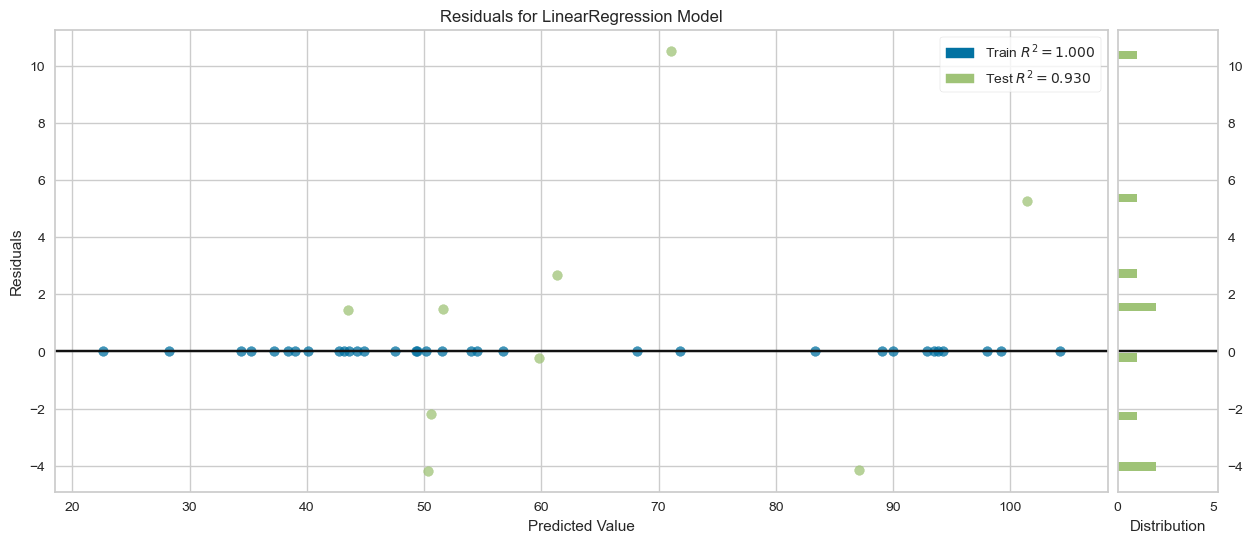

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()


### NOTE:

- This model may be overfitted,use proper L1 and L2 regularization if the model is overfitted.
- All other ML techniques and course will upload soon.This project covers simple EDA analysis and Model building.

#### Prepared By,
Ahamed Basith